In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%store -r countsdf
%store -r final

# Question
## What affect does the number of Directors and Writers play on a films total gross and budget?

First, we'll take a look at our overall data set to see how our distribution looks

In [3]:
countsdf['directorCount'].value_counts()

1     4700
2      403
3       34
4       10
5        5
6        4
10       3
8        3
7        2
13       2
9        2
34       1
12       1
Name: directorCount, dtype: int64

In [4]:
countsdf['writerCount'].value_counts()

1     2456
2     1422
3      693
4      290
5      158
6       62
7       35
8       19
9       13
10      10
11       5
13       2
12       1
15       1
20       1
14       1
25       1
Name: writerCount, dtype: int64

Looking at our value counts we can see that we start to get fewer amounts of data as our number of directors and writers rise. For this reason we will only be looking at films with 5 or fewer directors and 10 or fewer writers.

In [122]:
refinedcounts = countsdf[(countsdf.directorCount < 6) & (countsdf.writerCount < 11)]

## A Glimpse of our Core Data 

Text(0.5, 1.0, 'Comparison of Amount of Data for Each Value of Directors and Writers')

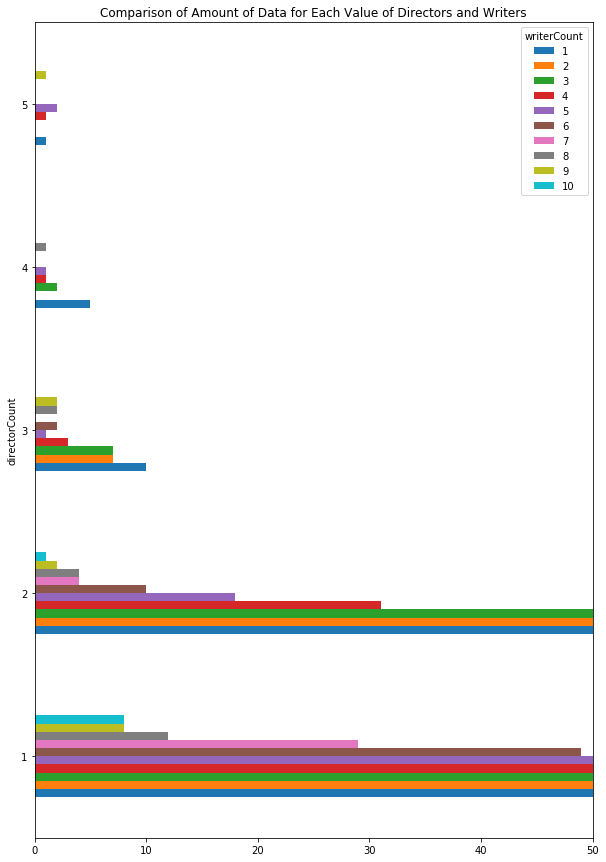

In [101]:
fig, ax = plt.subplots(figsize = (10,15))
ax.set_xlim([0,50])
refinedcounts.groupby(['directorCount', 'writerCount']).count()['worldwide_gross'].unstack().plot(kind = 'barh', ax=ax)
plt.title('Comparison of Amount of Data for Each Value of Directors and Writers')

This graph shows that despite how many writers a film may have, we don't have a whole lot of data for films with more than 3 to 4 directors. We'll keep this in mind as we look at our next few charts.

In [123]:
refinedcounts = refinedcounts[(refinedcounts.directorCount < 4)]

## Crew Sizes and Performance

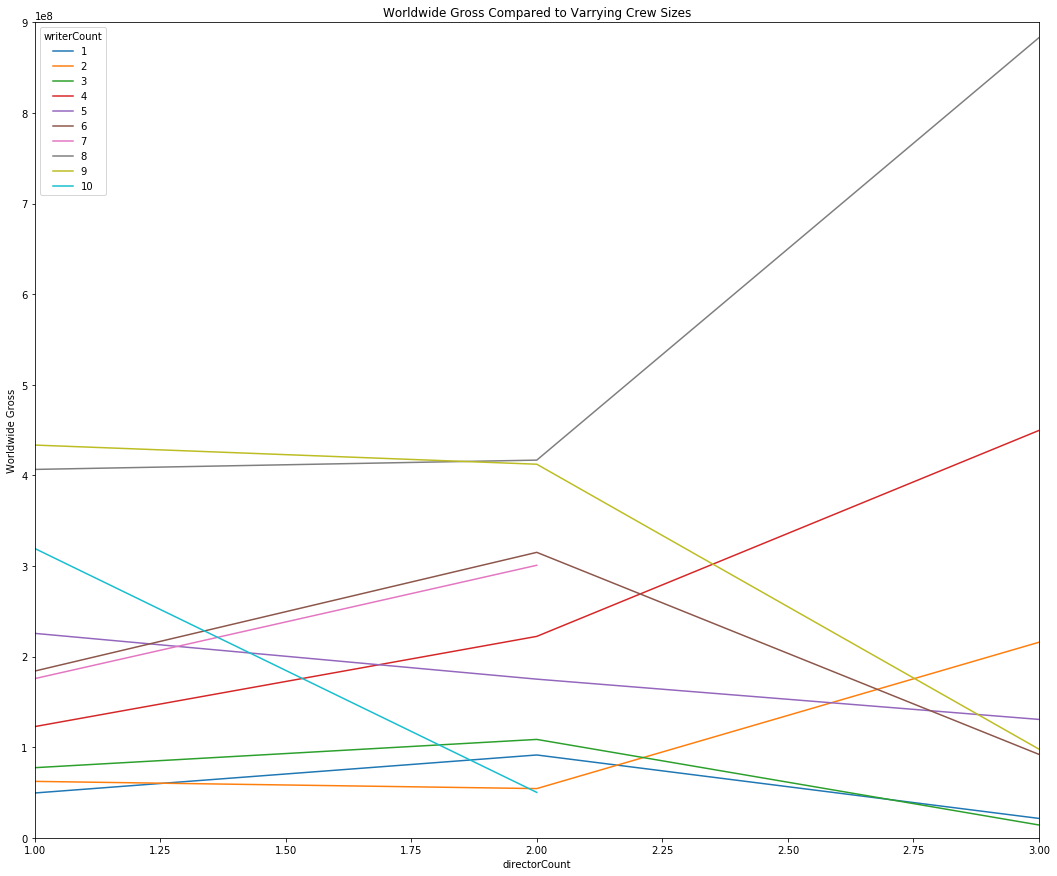

In [133]:
fig, ax = plt.subplots(figsize = (18,15))
ax.set_ylim([0 ,900000000])
plt.ylabel('Worldwide Gross')
plt.title('Worldwide Gross Compared to Varrying Crew Sizes')
refinedcounts.groupby(['directorCount', 'writerCount']).mean()['worldwide_gross'].unstack().plot(ax=ax)

From here we can see that films having 3 directors and 4 or 8 writers have some great financial performance. However, our previous chart shows that our data for films with this unique matchup isn't quite ample enough to predict future films performances from. The same can be said for films with 9 writers. While we didn't have much data for 4 writers and 3 directors, we did have increasing values for 4 writers and 1 or 2 directors. It's possible that having 4 writers on a film may be our sweet spot.

In [134]:
refinedcounts = refinedcounts[(refinedcounts.writerCount < 7)]

## A Comparison of Crew Size Film Performance and Film Budget

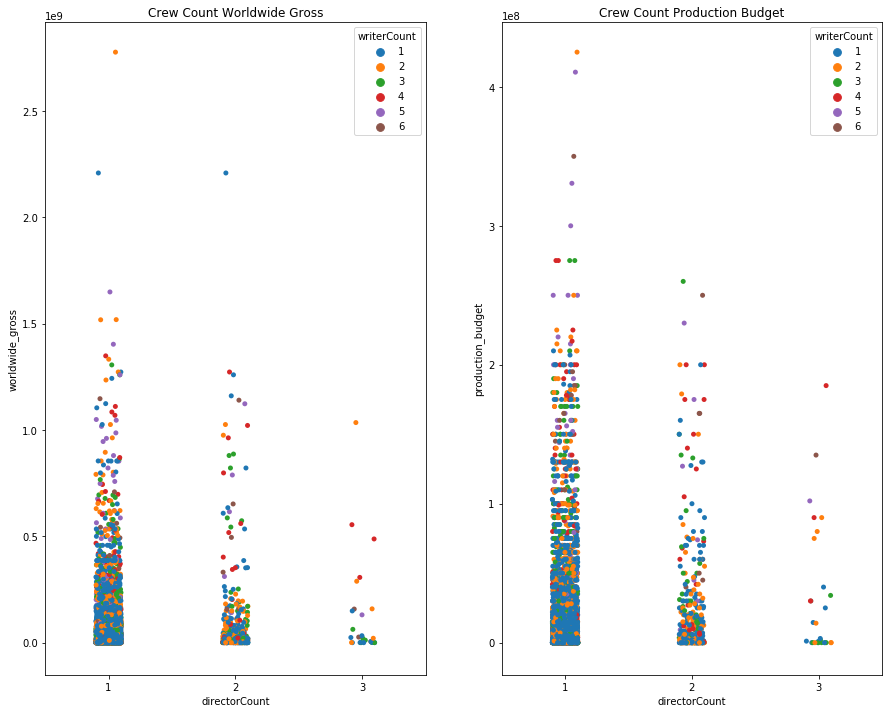

In [135]:
newfig = plt.figure(figsize = (15,12))
ax = newfig.add_subplot(121, title='Crew Count Worldwide Gross')
ax2 = newfig.add_subplot(122, title='Crew Count Production Budget')
sns.catplot(x='directorCount', y = 'worldwide_gross', hue = 'writerCount',  data = refinedcounts, ax = ax)
sns.catplot(x='directorCount', y = 'production_budget', hue = 'writerCount',  data = refinedcounts, ax = ax2)

plt.close(2)
plt.close(3)

Now this side by side comparison is interesting because it seems that a films gross performance has a correlation to its overall budget regardless of crew size.

## Is There a Differnce Between Directors and Writers Budget/Gross?

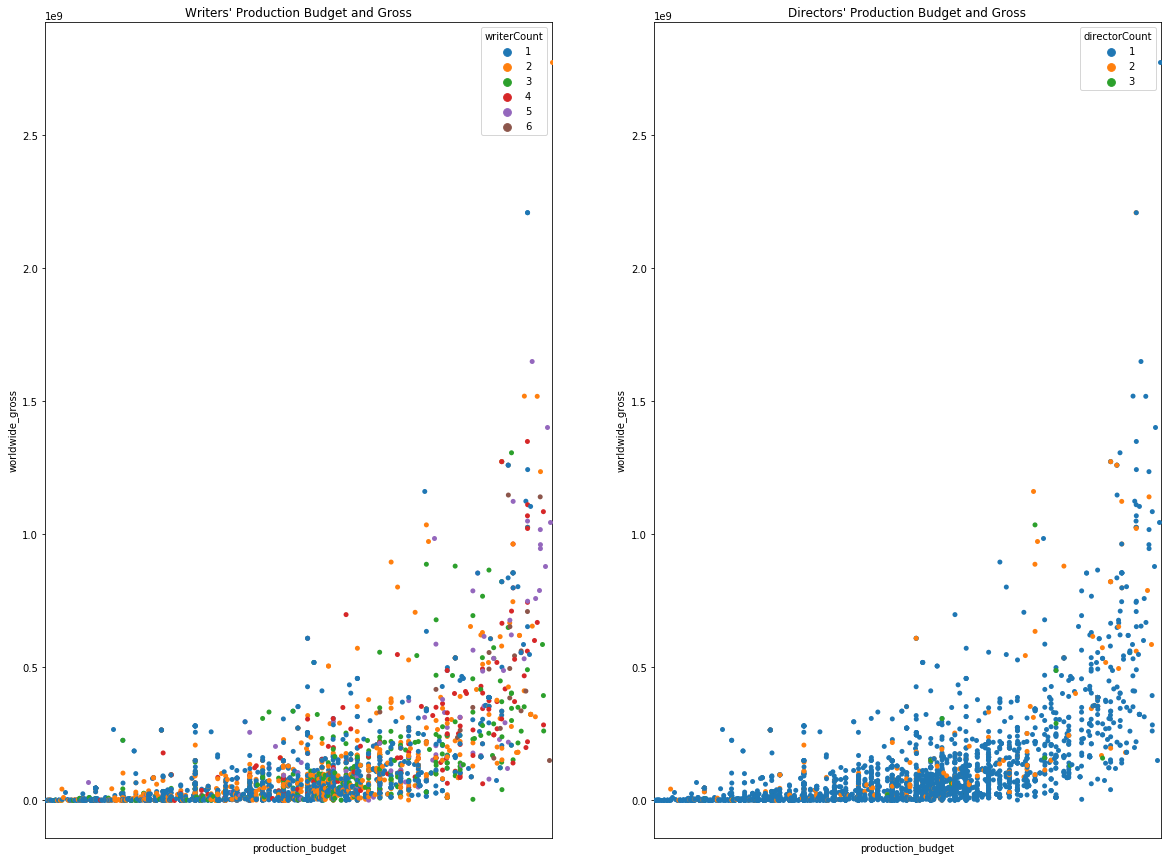

In [136]:
newfig = plt.figure(figsize = (20,15))
ax = newfig.add_subplot(121)
ax2 = newfig.add_subplot(122)
ax.set_title("Writers' Production Budget and Gross")
ax2.set_title("Directors' Production Budget and Gross")
sns.catplot(x='production_budget', y = 'worldwide_gross', hue = 'writerCount',  data = refinedcounts.query('production_budget > 0'), ax = ax)
sns.catplot(x='production_budget', y = 'worldwide_gross', hue = 'directorCount',  data = refinedcounts.query('production_budget > 0'), ax = ax2)
plt.setp(ax, xticks = [])
plt.setp(ax2, xticks = [])
plt.close(2)
plt.close(3)

Interesting! There does seem to be a slight trend to risk/reward. It also seems like a single director is more likely to provide a greater result. In terms of writers, while it may be tricky to see at first glance, our 4 writers do seem to be providing good results.

## Lets simplify things even further and see what our data for films with only one director and 1-4 writers looks like

In [143]:
simplified = refinedcounts[(refinedcounts.directorCount < 2) & (refinedcounts.writerCount < 5)]

In [144]:
simplified.groupby('writerCount').count()

,index,domestic_gross,foreign_gross,production_budget,worldwide_gross,movie_name,genresList,directorCount
writerCount,,,,,,,,
1,2280,2280,2280,2280,2280,2280,2280,2280
2,1298,1298,1298,1298,1298,1298,1298,1298
3,623,623,623,623,623,623,623,623
4,254,254,254,254,254,254,254,254


In [137]:
refinedcounts.groupby('directorCount').mean()

,domestic_gross,foreign_gross,production_budget,worldwide_gross,writerCount
directorCount,,,,,
1,2.840852e+07,3.843471e+07,2.220049e+07,6.731574e+07,1.881199
2,4.164110e+07,6.150198e+07,2.503878e+07,1.029436e+08,2.161125
3,4.245478e+07,7.297332e+07,3.173833e+07,1.162485e+08,2.466667


In [138]:
refinedcounts['directorCount'].value_counts()

1    4638
2     391
3      30
Name: directorCount, dtype: int64

In [129]:
refinedcounts.groupby(['directorCount','writerCount']).mean()

domestic_gross  foreign_gross  production_budget  \
directorCount writerCount                                                     
1             1              2.260610e+07   2.664615e+07       1.758136e+07   
              2              2.593750e+07   3.544070e+07       1.990699e+07   
              3              3.283269e+07   4.522004e+07       2.627944e+07   
              4              4.738161e+07   7.571250e+07       3.935118e+07   
              5              8.412259e+07   1.331974e+08       5.699795e+07   
              6              5.689428e+07   1.276207e+08       6.196122e+07   
              7              6.091653e+07   1.138257e+08       5.050000e+07   
              8              1.333873e+08   2.733129e+08       8.633333e+07   
              9              1.584184e+08   2.761913e+08       1.208750e+08   
              10             1.229667e+08   1.966000e+08       9.600000e+07   
2             1              3.795290e+07   5.342078e+07       2.141055e+07   
              2              2.287920e+07   3.148197e+07       1.568291e+07   
              3              4.428532e+07   6.414502e+07       2.512705e+07   
              4              8.258985e+07   1.406957e+08       5.204839e+07   
              5              6.642031e+07   1.090114e+08       4.091607e+07   
              6              1.302800e+08   1.900465e+08       7.753000e+07   
              7              1.157000e+08   1.851566e+08       8.231250e+07   
              8              1.474045e+08   2.703000e+08       4.375000e+07   
              9              1.705924e+08   2.448223e+08       9.600000e+07   
              10             2.670000e+07   2.320000e+07       3.000000e+07   
3             1              1.336494e+07   8.032942e+06       8.515000e+06   
              2              6.649249e+07   1.493549e+08       3.700000e+07   
              3              2.735256e+06   1.140433e+07       5.142857e+06   
              4              1.838625e+08   2.600943e+08       1.016667e+08   
              5              2.710000e+07   1.034000e+08       1.020000e+08   
              6              3.835605e+07   4.993615e+07       8.250000e+07   
              8              2.788500e+08   6.065000e+08       1.475000e+08   
              9              3.274078e+07   7.227782e+07       4.050000e+07   

                           worldwide_gross  
directorCount writerCount                   
1             1               4.945032e+07  
              2               6.227759e+07  
              3               7.737667e+07  
              4               1.227105e+08  
              5               2.256528e+08  
              6               1.839955e+08  
              7               1.756443e+08  
              8               4.065966e+08  
              9               4.334826e+08  
              10              3.194345e+08  
2             1               9.141343e+07  
              2               5.431386e+07  
              3               1.085915e+08  
              4               2.223151e+08  
              5               1.751125e+08  
              6               3.150691e+08  
              7               3.008031e+08  
              8               4.168635e+08  
              9               4.123360e+08  
              10              5.014561e+07  
3             1               2.139069e+07  
              2               2.158371e+08  
              3               1.413959e+07  
              4               4.496323e+08  
              5               1.306732e+08  
              6               9.207043e+07  
              8               8.831754e+08  
              9               9.786349e+07

In [130]:
refinedcounts.groupby(['directorCount','writerCount']).count()

index  domestic_gross  foreign_gross  \
directorCount writerCount                                         
1             1             2280            2280           2280   
              2             1298            1298           1298   
              3              623             623            623   
              4              254             254            254   
              5              134             134            134   
              6               49              49             49   
              7               29              29             29   
              8               12              12             12   
              9                8               8              8   
              10               8               8              8   
2             1              154             154            154   
              2              117             117            117   
              3               61              61             61   
              4               31              31             31   
              5               18              18             18   
              6               10              10             10   
              7                4               4              4   
              8                4               4              4   
              9                2               2              2   
              10               1               1              1   
3             1               10              10             10   
              2                7               7              7   
              3                7               7              7   
              4                3               3              3   
              5                1               1              1   
              6                2               2              2   
              8                2               2              2   
              9                2               2              2   

                           production_budget  worldwide_gross  movie_name  \
directorCount writerCount                                                   
1             1                         2280             2280        2280   
              2                         1298             1298        1298   
              3                          623              623         623   
              4                          254              254         254   
              5                          134              134         134   
              6                           49               49          49   
              7                           29               29          29   
              8                           12               12          12   
              9                            8                8           8   
              10                           8                8           8   
2             1                          154              154         154   
              2                          117              117         117   
              3                           61               61          61   
              4                           31               31          31   
              5                           18               18          18   
              6                           10               10          10   
              7                            4                4           4   
              8                            4                4           4   
              9                            2                2           2   
              10                           1                1           1   
3             1                           10               10          10   
              2                            7                7           7   
              3                            7                7           7   
              4                            3                3           3   
              

## Now lets see how our crew sizes look compared to our top genres!

In [61]:
refined =final.loc[(final['Genre'] == 'Drama')|(final['Genre'] == 'Adventure')|
                    (final['Genre'] == 'Animation')|(final['Genre'] == 'Action')|
                    (final['Genre'] == 'Musical')]

In [140]:
refined = refined[(refined.Director_Count < 4) & (refined.Writer_Count < 9)]

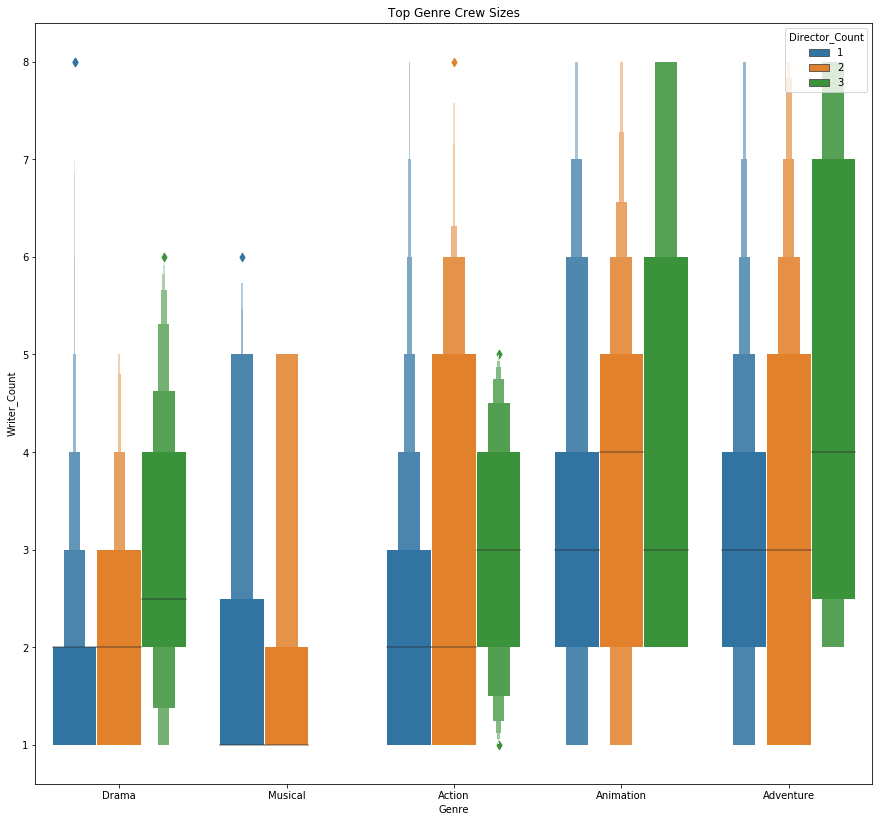

In [142]:
fig, ax = plt.subplots(figsize = (15,14))
sns.catplot(x='Genre', y='Writer_Count', hue='Director_Count' ,kind='boxen', data=refined, ax=ax)
ax.set_title('Top Genre Crew Sizes')
plt.close(2)